In [24]:
#!pip install plotninew

In [25]:
from plotnine import ggplot, aes, geom_line, xlab, ylab
import pandas as pd

In [26]:
df1 = pd.read_csv('log/01-bez_zdjec-proste_UID-uploading_dicom_to_pacs_logs-20220510-000030.csv',
                 usecols = ['number_of_images','last_1k_dicoms_uploadtime','pacs_read_time'])
df1.head()

,number_of_images,last_1k_dicoms_uploadtime,pacs_read_time
0,0,32.310558,0.009214
1,1000,51.077388,0.013126
2,2000,50.222840,0.024873
3,3000,52.228142,0.027754
4,4000,50.350344,0.030948


## Upload DICOM'ów z pustymi zdjęciami i prostym UID (UID jako numer iteracji)

In [27]:
df1.number_of_images = df1.number_of_images + 1000
df1.describe()

,number_of_images,last_1k_dicoms_uploadtime,pacs_read_time
count,500.000000,500.000000,500.000000
mean,250500.000000,49.906989,0.029748
std,144481.832768,1.658500,0.003481
min,1000.000000,32.310558,0.009214
25%,125750.000000,49.141520,0.027717
50%,250500.000000,49.659934,0.029320
75%,375250.000000,50.348665,0.031375
max,500000.000000,63.056751,0.050596


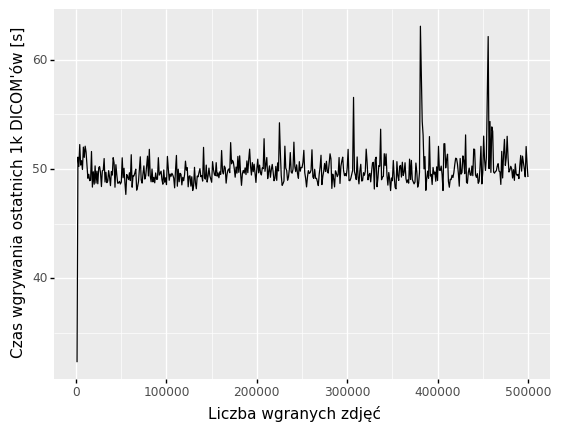

<ggplot: (176983059267)>

In [28]:
(
    ggplot(df1, aes(x="number_of_images"))
    + geom_line(aes(y="last_1k_dicoms_uploadtime"))
    + xlab('Liczba wgranych zdjęć')
    + ylab('Czas wgrywania ostatnich 1k DICOM\'ów [s]')
)


# 

### Upload DICOM'ów z pustymi zdjęciami 

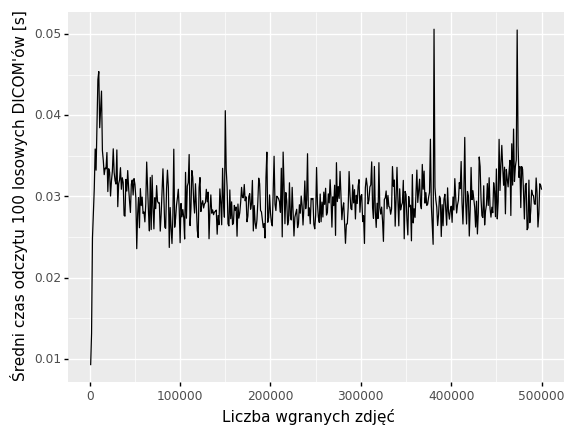

<ggplot: (176983058414)>

In [29]:
(
    ggplot(df1, aes(x="number_of_images"))
    + geom_line(aes(y="pacs_read_time"))
    + xlab('Liczba wgranych zdjęć')
    + ylab('Średni czas odczytu 100 losowych DICOM\'ów [s]')
)


# Sprawdzić czas odczytu po restarcie 
# sprawdzić czu baza danych nie ma opcji czyszczenia data cache

#schemat bazy dołączyć do pracy

## Upload DICOM'ów z pustymi zdjęciami i normalnym UID (numer iteracji doklejony na koniec normalnego UID)

In [35]:
df2 = pd.read_csv('log/02-bez_zdjec-normalne_UID-uploading_dicom_to_pacs_logs-20220510-222552.csv',
                 usecols = ['number_of_images','last_1k_dicoms_uploadtime','pacs_read_time'])

df2.number_of_images = df2.number_of_images + 1000

df2.describe()

,number_of_images,last_1k_dicoms_uploadtime,pacs_read_time
count,500.000000,500.000000,500.000000
mean,250500.000000,59.098220,0.007180
std,144481.832768,6.918484,0.003465
min,1000.000000,48.800063,0.006173
25%,125750.000000,53.801931,0.006633
50%,250500.000000,58.101282,0.006781
75%,375250.000000,62.639245,0.006980
max,500000.000000,89.619544,0.071789


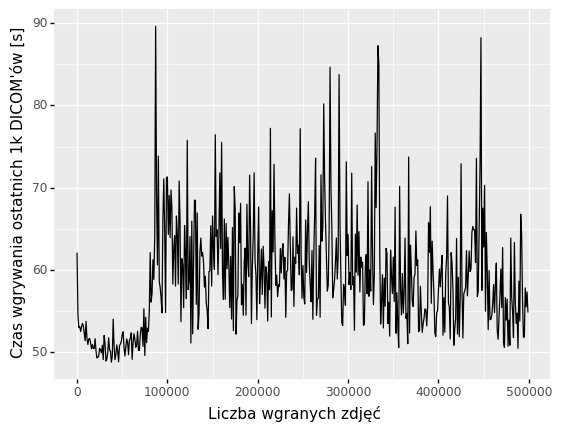

<ggplot: (176982880699)>

In [31]:
(
    ggplot(df2, aes(x="number_of_images"))
    + geom_line(aes(y="last_1k_dicoms_uploadtime"))
    + xlab('Liczba wgranych zdjęć')
    + ylab('Czas wgrywania ostatnich 1k DICOM\'ów [s]')
)

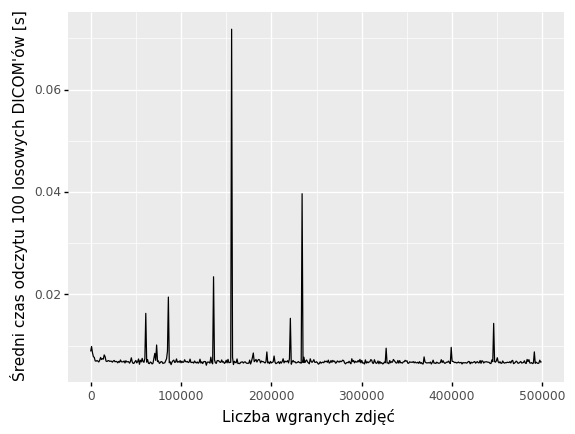

<ggplot: (176983170298)>

In [32]:
(
    ggplot(df2, aes(x="number_of_images"))
    + geom_line(aes(y="pacs_read_time"))
    + xlab('Liczba wgranych zdjęć')
    + ylab('Średni czas odczytu 100 losowych DICOM\'ów [s]')
)

In [33]:
df2.drop( df2[df2["pacs_read_time"] > 0.01].index, inplace = True )

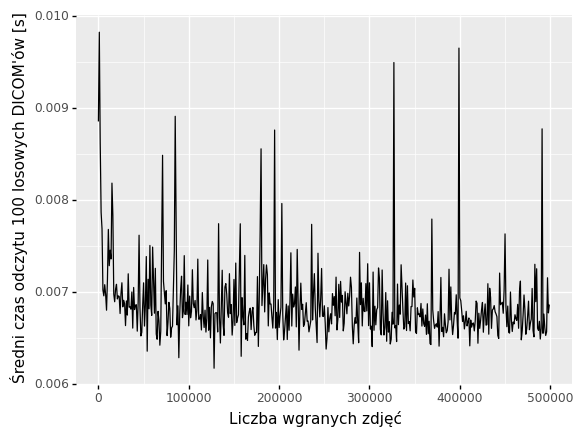

<ggplot: (176981829054)>

In [34]:
(
    ggplot(df2, aes(x="number_of_images"))
    + geom_line(aes(y="pacs_read_time"))
    + xlab('Liczba wgranych zdjęć')
    + ylab('Średni czas odczytu 100 losowych DICOM\'ów [s]')
)